In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ProjDataAccidentDUICategorized.csv to ProjDataAccidentDUICategorized.csv


In [ ]:
import pandas as pd
data = pd.read_csv('ProjDataAccidentDUICategorized.csv', delimiter=',', dtype="category") 

data.head()
#print(data.dtypes)

,STATE,PVH,PERNOTMVIT,PERMVIT,PERSONS,DAY,MONTH,DAYofWEEK,NHS,Urban(1)orRural(2),FUNC_SYS,RD_OWNER,ROUTE,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,CF1,CF2,CF3,FATALS,MinutesOfDay,Drunk Driver Involved
0,1,1,0,1,1,5,1,6,1,1,1,1,1,0,14,0,0,1,1,0,2,4,1,0,0,0,1,2,0
1,1,0,0,2,2,8,1,2,1,2,1,1,1,0,38,0,1,12,1,0,3,2,2,20,0,0,2,1,0
2,1,0,0,2,2,8,1,2,1,1,1,1,1,0,24,0,0,1,1,1,4,2,10,0,0,0,1,1,0
3,1,0,0,2,2,9,1,3,1,1,1,1,1,0,24,0,0,1,1,0,4,1,10,0,0,0,1,3,0
4,1,0,0,2,2,19,1,6,1,2,1,1,1,0,12,1,0,1,1,0,1,1,1,0,0,0,1,2,0


In [ ]:
import numpy as np
dataset = np.genfromtxt('ProjDataAccidentDUICategorized.csv', delimiter=",", skip_header = True) 

In [ ]:
#Shuffle and Display
np.set_printoptions(precision = 2)
np.set_printoptions(formatter = {'int': '{: 1f}'.format})

#shuffle
#import random
#np.random.shuffle(dataset)

print(dataset.shape)
print('')
print(dataset[0:5])

(33654, 29)

[[ 1.  1.  0.  1.  1.  5.  1.  6.  1.  1.  1.  1.  1.  0. 14.  0.  0.  1.
   1.  0.  2.  4.  1.  0.  0.  0.  1.  2.  0.]
 [ 1.  0.  0.  2.  2.  8.  1.  2.  1.  2.  1.  1.  1.  0. 38.  0.  1. 12.
   1.  0.  3.  2.  2. 20.  0.  0.  2.  1.  0.]
 [ 1.  0.  0.  2.  2.  8.  1.  2.  1.  1.  1.  1.  1.  0. 24.  0.  0.  1.
   1.  1.  4.  2. 10.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  0.  2.  2.  9.  1.  3.  1.  1.  1.  1.  1.  0. 24.  0.  0.  1.
   1.  0.  4.  1. 10.  0.  0.  0.  1.  3.  0.]
 [ 1.  0.  0.  2.  2. 19.  1.  6.  1.  2.  1.  1.  1.  0. 12.  1.  0.  1.
   1.  0.  1.  1.  1.  0.  0.  0.  1.  2.  0.]]


In [ ]:
#Splitting Inputs and Output
X=dataset[:,:28] #Inputs
y=dataset[:,28]  #Output
#y = np.row_stack(dataset[:,28]) #Testing 
#z = np.row_stack(dataset[:,27]) #time In Minutes
#z = dataset[:,27] #time In Minutes
print(X.shape)
print(y.shape)
#print(z.shape)
#print(z[0,0])

(33654, 28)
(33654,)


In [ ]:
#OneHotEncode Data

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse=False)
Xenc = enc.fit(X[:,:28]).transform(X[:,:29])
print(Xenc.shape)
#print(z.shape)
#Xenc = np.append(Xenc, z, axis=1)
#print(Xenc.shape)

(33654, 404)


In [ ]:
#Train Test Split and seed
from sklearn.model_selection import train_test_split
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(Xenc, y, random_state= 4300, 
test_size = .15, shuffle=True) #, stratify=y )
print(XTRAIN.shape)
print(XVALID.shape)
print(YTRAIN.shape)
print(YVALID.shape)

#Normalize test Group 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XTRAIN)

XTRAIN = scaler.transform(XTRAIN)
XVALID = scaler.transform(XVALID)

(28605, 404)
(5049, 404)
(28605,)
(5049,)


In [ ]:
#Verify Shapes of XTRAIN/VALID YTRAIN/VALID
print("Training Shape: " + str(XTRAIN.shape))
print("Training Output Shape: " + str(YTRAIN.shape))
print("Validation Shape: " + str(XVALID.shape))
print("Validation Output Shape: " + str(YVALID.shape))

Training Shape: (28605, 404)
Training Output Shape: (28605,)
Validation Shape: (5049, 404)
Validation Output Shape: (5049,)


In [ ]:
print("Total Drunk Drivers for Training Data: " + str(sum(YTRAIN)))
print("Total Drunk Drivers for Validation Data: " + str(sum(YVALID)))
print("Total Drunk Drivers in Training and Validation: " + str(sum(YTRAIN)+sum(YVALID)))
print("Total Drunk Drivers from Original Dataset: " +str(sum(dataset[:,28])))
print()
ratio = (100*(1-8379/33654))
print("Percent of the incidents not involving a drunk driver %.2f%%" % ratio)

Total Drunk Drivers for Training Data: 7129.0
Total Drunk Drivers for Validation Data: 1250.0
Total Drunk Drivers in Training and Validation: 8379.0
Total Drunk Drivers from Original Dataset: 8379.0

Percent of the incidents not involving a drunk driver 75.10%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import categorical_accuracy
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Dense(10, input_dim = 404, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

callback_a = ModelCheckpoint(filepath= 'project.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 50, verbose=1)
history = model.fit(XTRAIN, YTRAIN, batch_size=23000, epochs=2000, verbose=1, validation_data=(XVALID, YVALID), callbacks=[callback_a, callback_b]) 
print(history.params)

Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4233 - binary_accuracy: 0.8075
Epoch 00001: val_loss improved from inf to 0.45011, saving model to project.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.4217 - binary_accuracy: 0.8080 - val_loss: 0.4501 - val_binary_accuracy: 0.7895
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4217 - binary_accuracy: 0.8078
Epoch 00002: val_loss did not improve from 0.45011
2/2 [==============================] - 0s 28ms/step - loss: 0.4236 - binary_accuracy: 0.8079 - val_loss: 0.4501 - val_binary_accuracy: 0.7891
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4257 - binary_accuracy: 0.8047
Epoch 00003: val_loss did not improve from 0.45011
2/2 [==============================] - 0s 27ms/step - loss: 0.4170 - binary_accuracy: 0.8081 - val_loss: 0.4501 - val_binary_accuracy: 0.7895
Epoch 4/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.4246 - binary_accu

{'verbose': 1, 'epochs': 2000, 'steps': 2}


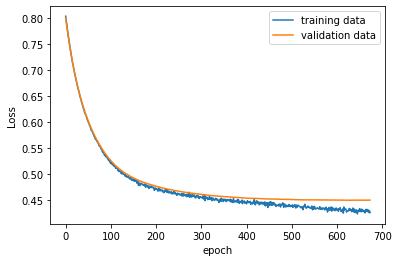

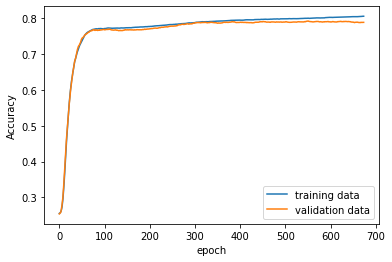

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                4050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 4,061
Trainable params: 4,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights('project.hdf5')

# Check what's in the history
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['binary_accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_binary_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt2.show()
model.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.set_printoptions(precision = 2)

prediction = model.predict(XVALID)
prediction = np.round(np.clip(model.predict(XVALID), 0, 1)) # binary

Validation_Accuracy = accuracy_score(YVALID, prediction.round())
Validation_Precision = precision_score(YVALID, prediction.round())
Validation_Recall = recall_score(YVALID, prediction.round())
Validation_F1score = f1_score(YVALID, prediction.round())

print("Validation Accuracy: %.2f%%" % (Validation_Accuracy * 100.0))
print("Validation Precision: %.2f%%" % (Validation_Precision * 100.0))
print("Validation Recall: %.2f%%" % (Validation_Recall * 100.0))
print("Validation F1-score: %.2f" % (Validation_F1score))
print()
result = (100*Validation_Accuracy)-ratio
print("Model's predicted outcome rated against assuming \n"
+ "non-intoxicated involvment for all cases of %.2f%%"  %result +" points.")

Validation Accuracy: 79.12%
Validation Precision: 62.56%
Validation Recall: 39.04%
Validation F1-score: 0.48

Model's predicted outcome rated against assuming 
non-intoxicated involvment for all cases of 4.02% points.
